In [1]:
import pandas as pd
import numpy as np
from itertools import product
from ast import literal_eval
import seaborn as sns
import random
import matplotlib.pyplot as plt
import copy

In [3]:
pubs_author_funder = pd.read_csv("..//..//..//data//Data//DerivedData//CleanedRawData//pubs_author_funder.csv")
pubs_author_funder['author_country'] = pubs_author_funder['author_country'].apply(literal_eval)
#pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].apply(literal_eval)

In [6]:
pubs_author_funder

,id,author_country,funder_country
0,30507292,[Turkey],['Turkey']
1,30574690,"[United States, France]","['United States', 'United States', 'United Sta..."
2,30574691,[Russia],['Russia']
3,30585095,"[Spain, Spain]","['Spain', 'Spain', 'Spain', 'Spain', 'Spain', ..."
4,30585097,"[Germany, Spain]",['Spain']
...,...,...,...
12759125,65301180,[Pakistan],NaN
12759126,65301286,"[Singapore, Singapore]",NaN
12759127,65301288,[Iran],NaN
12759128,65301295,[Israel],NaN


In [7]:
pubs_author_fair=copy.deepcopy(
    pubs_author_funder[['id','author_country']])
pubs_author_fair['funder_country']=pubs_author_fair['author_country']
pubs_author_fair.head()

,id,author_country,funder_country
0,30507292,[Turkey],[Turkey]
1,30574690,"[United States, France]","[United States, France]"
2,30574691,[Russia],[Russia]
3,30585095,"[Spain, Spain]","[Spain, Spain]"
4,30585097,"[Germany, Spain]","[Germany, Spain]"


In [8]:
pubs_author_fair['funding_units'] = pubs_author_fair[
    'funder_country'].apply(lambda x: len(x))
pubs_author_fair.head()

,id,author_country,funder_country,funding_units
0,30507292,[Turkey],[Turkey],1
1,30574690,"[United States, France]","[United States, France]",2
2,30574691,[Russia],[Russia],1
3,30585095,"[Spain, Spain]","[Spain, Spain]",2
4,30585097,"[Germany, Spain]","[Germany, Spain]",2


In [9]:
def generate_null(data):
    cntry_cntry_explodelist = []
    for index, row in data.iterrows():
        units = row['funding_units']
        author_country = row['author_country']
        funding_country=row['funder_country']
        num_author = len(author_country)
        num_funder=len(funding_country)
        for author_c in author_country:
            for funder_c in funding_country:
                credit = units/(num_author*num_funder)
                templist = [funder_c,author_c, credit]
                cntry_cntry_explodelist.append(templist)
                
    cntry_cntry_null = pd.DataFrame(
        cntry_cntry_explodelist, columns=['source','target','value'])
    cntry_cntry_null = cntry_cntry_null.groupby(['source','target'])['value'].sum().reset_index()
    cntry_cntry_null = cntry_cntry_null.pivot_table(
        index='source',columns='target', values='value', fill_value=0)
    return cntry_cntry_null


In [19]:
def get_normedmatrix(indexlist, collist, actual_df, random_df):
    
    randomnormed_df = pd.DataFrame(
        index=indexlist,columns=collist)
    for ind, col in product(indexlist, collist):
        try:
            actual_value=actual_df.loc[ind,col]
        except:
            actual_value=0
        random_value=random_df.loc[ind,col]
        exp=actual_value/random_value
        randomnormed_df.loc[ind,col]=exp
    randomnormed_df = randomnormed_df.fillna(0)
    
    return randomnormed_df


In [10]:
cntry_cntry_df = pd.read_csv("..//..//..//data//Data//DerivedData//Derived//funding_source_target.csv")
cntry_cntry_df = cntry_cntry_df.pivot_table(
    index='source',columns='target', values='value', fill_value=0)
cntry_cntry_df.head()

target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.5,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.333333,...,2.299242,0.0,0.0,0.0,0.0,0.0,0.50,0.000000,0.0,0.0
Albania,0.0,8.833333,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.277778,...,1.000000,0.0,0.0,0.0,0.0,0.0,1.00,0.000000,0.0,0.0
Algeria,0.0,0.000000,1706.342726,0.0,0.000000,0.0,0.0,3.92619,0.0,1.997885,...,21.937491,0.0,0.0,0.0,0.0,0.0,0.25,0.333333,0.0,0.0
Andorra,0.0,0.000000,0.000000,3.5,0.000000,0.0,0.0,0.00000,0.0,0.000000,...,3.900000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0
Angola,0.0,0.000000,0.000000,0.0,20.581349,0.0,0.0,0.00000,0.0,2.650000,...,3.602381,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0


In [11]:
cntry_out = cntry_cntry_df.sum(axis=1).reset_index(name="unitsout")
cntry_in = cntry_cntry_df.sum(axis=0).reset_index(name='unitsin')
cntry_in_out=cntry_in.merge(
    cntry_out, left_on="target",right_on="source",how="inner")
cntry_in_out.head()

,target,unitsin,source,unitsout
0,Afghanistan,95.035440,Afghanistan,23.0
1,Albania,207.108642,Albania,34.0
2,Algeria,4864.172289,Algeria,2607.0
3,Andorra,25.181734,Andorra,53.0
4,Angola,204.422412,Angola,76.0


In [12]:
author_fair_matrix=generate_null(pubs_author_fair)

In [55]:
author_fair_matrix.loc['United States','China']

164564.20424282353

In [26]:
author_fair_matrix_normed = author_fair_matrix.div(author_fair_matrix.sum(axis=1), axis=0)
author_fair_matrix_normed.head()

target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,4.102371e-01,0.000000,0.000072,0.000000,0.000148,0.0,0.000000,0.000114,0.000000,0.006109,...,0.141251,0.000082,0.000663,0.0,0.0,0.000071,0.000873,0.000008,0.000155,0.000000
Albania,0.000000e+00,0.588437,0.000524,0.000011,0.000000,0.0,0.000000,0.000248,0.000244,0.002324,...,0.022520,0.000266,0.000037,0.0,0.0,0.000364,0.000022,0.000019,0.000085,0.000000
Algeria,9.822870e-07,0.000027,0.720111,0.000000,0.000008,0.0,0.000000,0.000276,0.000021,0.000932,...,0.007754,0.000002,0.000015,0.0,0.0,0.000065,0.000389,0.000107,0.000007,0.000015
Andorra,0.000000e+00,0.000278,0.000000,0.293910,0.000000,0.0,0.000000,0.003066,0.000278,0.001146,...,0.027655,0.000361,0.000000,0.0,0.0,0.002818,0.000000,0.000000,0.000000,0.000000
Angola,1.288824e-04,0.000000,0.000497,0.000000,0.368230,0.0,0.000157,0.002282,0.000000,0.008643,...,0.057787,0.001189,0.000000,0.0,0.0,0.000405,0.000717,0.000173,0.000450,0.000536


In [34]:
funderlist=cntry_cntry_df.index
authorlist=cntry_cntry_df.columns
cntrylist=[item for item in funderlist if item in authorlist]

In [37]:
author_fair_matrix_normed = author_fair_matrix_normed.loc[cntrylist,:]
author_fair_matrix_normed = author_fair_matrix_normed.reindex(cntrylist)

In [36]:
funder_out=cntry_out[cntry_out['source'].isin(cntrylist)]
funder_out = funder_out.set_index('source').reindex(cntrylist)
unitsout = funder_out['unitsout'].values.tolist()
funder_out.head()

,unitsout
source,
Afghanistan,23.0
Albania,34.0
Algeria,2607.0
Andorra,53.0
Angola,76.0


In [38]:
expect_df = author_fair_matrix_normed.mul(unitsout, axis=0)
expect_df.head()

target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,9.435452,0.000000,0.001665,0.000000,0.003412,0.0,0.000000,0.002611,0.000000,0.140503,...,3.248782,0.001894,0.015242,0.0,0.0,0.001633,0.020070,0.000194,0.003570,0.000000
Albania,0.000000,20.006873,0.017805,0.000359,0.000000,0.0,0.000000,0.008421,0.008285,0.079032,...,0.765673,0.009032,0.001260,0.0,0.0,0.012371,0.000748,0.000645,0.002889,0.000000
Algeria,0.002561,0.069814,1877.328140,0.000000,0.020219,0.0,0.000000,0.719973,0.053852,2.430288,...,20.213717,0.006328,0.038354,0.0,0.0,0.170147,1.013904,0.279058,0.019129,0.038605
Andorra,0.000000,0.014722,0.000000,15.577223,0.000000,0.0,0.000000,0.162518,0.014722,0.060723,...,1.465716,0.019120,0.000000,0.0,0.0,0.149373,0.000000,0.000000,0.000000,0.000000
Angola,0.009795,0.000000,0.037744,0.000000,27.985455,0.0,0.011933,0.173435,0.000000,0.656896,...,4.391791,0.090373,0.000000,0.0,0.0,0.030774,0.054495,0.013126,0.034213,0.040708


In [57]:
normed_byexpect=get_normedmatrix(
    cntrylist, authorlist, cntry_cntry_df, expect_df)
normed_byexpect.head()

<ipython-input-19-13d4e271a30e>:11: RuntimeWarning: invalid value encountered in double_scalars
  exp=actual_value/random_value
<ipython-input-19-13d4e271a30e>:11: RuntimeWarning: divide by zero encountered in double_scalars
  exp=actual_value/random_value


target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Afghanistan,0.052992,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.00000,0.0,2.372434,...,0.707724,0.0,0.0,0.0,0.0,0.0,24.912274,0.000000,0.0,0.0
Albania,0.000000,0.441515,0.000000,0.000000,0.00000,0.0,0.0,0.00000,0.0,3.514757,...,1.306040,0.0,0.0,0.0,0.0,0.0,1336.774352,0.000000,0.0,0.0
Algeria,0.000000,0.000000,0.908921,0.000000,0.00000,0.0,0.0,5.45325,0.0,0.822077,...,1.085277,0.0,0.0,0.0,0.0,0.0,0.246572,1.194494,0.0,0.0
Andorra,0.000000,0.000000,0.000000,0.224687,0.00000,0.0,0.0,0.00000,0.0,0.000000,...,2.660815,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
Angola,0.000000,0.000000,0.000000,0.000000,0.73543,0.0,0.0,0.00000,0.0,4.034122,...,0.820253,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [59]:
normed_byexpect=normed_byexpect.replace([np.inf, -np.inf], 0)

In [65]:
top20 = funder_out.sort_values(by='unitsout', ascending=False).head(20).index

In [67]:
import matplotlib.colors as colors
divnorm = colors.DivergingNorm(vmin=0, vcenter=1, vmax=6)

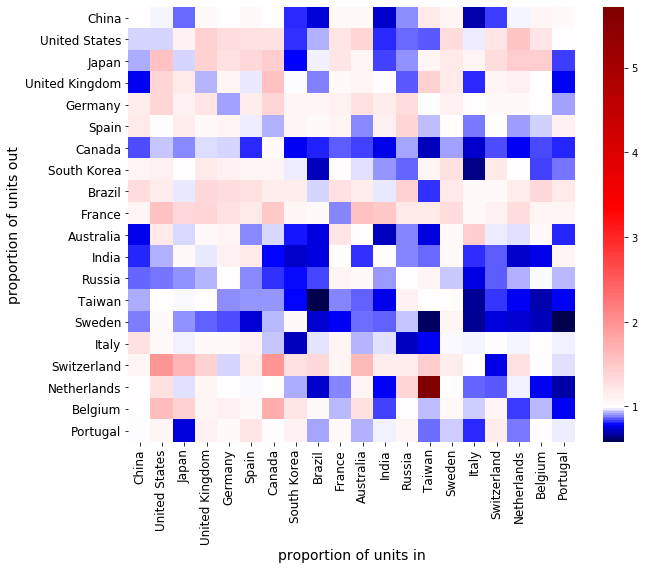

In [68]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(normed_byexpect.loc[top20,top20],cmap="seismic", norm=divnorm)
plt.ylabel("proportion of units out", fontsize=14)
plt.xlabel("proportion of units in", fontsize=14)
plt.tick_params(axis='both',labelsize=12)